## Import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Vì dữ liệu năm 2022 chưa cập nhật đầy đủ, vì thế ta sẽ xóa đi các dòng dữ liệu năm 2022, đồng thời tạo thêm thuộc tính `Year` để thuận tiện trong quá trình đặt câu hỏi và đưa ra những so sánh!**

In [2]:
gas_df = pd.read_csv("Data/PROCESSED_heating-gas-consumption-and-cost.csv")
#Trích năm từ cột 'Revenue Month'
gas_df['Year'] =  pd.to_datetime(gas_df['Revenue Month']).dt.year
#Xoá các dòng có giá trị 'Year' là 2022
gas_df = gas_df.drop(gas_df[gas_df['Year'] == 2022].index)
gas_df.head(5)

,Development Name,Borough,Location,Funding Source,Vendor Name,Revenue Month,Service Start Date,Service End Date,# days,Current Charges,Consumption (Therms),Year
0,ADAMS,BRONX,BLD 04,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,78292.97,136632.00,2010
1,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,44335.21,153899.18,2010
2,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,22034.86,76488.82,2010
3,AMSTERDAM,MANHATTAN,BLD 02,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,95456.57,169137.00,2010
4,AMSTERDAM AVENUE,MANHATTAN,BLD 01,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,14607.73,26301.00,2010


## 1. Quận nào tiêu thụ và tốn nhiều chi phí cho khí đốt nóng nhiều nhất?
**- Mục đích:** 

   + Nắm được nhu cầu tiêu thụ khí đốt của từng quận trong thành phố. Từ đó, có kế hoạch phân bổ chi phí, nguồn hỗ trợ đúng thực tế, chính xác và kịp thời. 
    
**- Cách thực hiện:** 

   + Bằng cách grouby cột `Borough`, thống kế tổng lượng tiêu thụ khí đốt, chi phí thanh toán gần đây thông qua cột `Consumption (Therms)` và `Current Charges`. Do tổng các giá trị này rất lớn nên để thuận tiện cho quá trình so sánh ta sẽ tiến hành lấy `log10` các giá trị. Sau đó, lưu vào dataframe `bor_df`.
   + Tìm max, min trên các cột `Consumption (Therms)`, `Current Charges` sẽ cho ta kết quả quận nào tiêu thụ và tốn nhiều chi phí cho khí đốt nóng nhiều và ít nhất.

In [3]:
bor_df= gas_df.groupby('Borough').agg(
    Consumption =('Consumption (Therms)', lambda x: np.log10(x.sum())),
    CurrentCharges = ('Current Charges', lambda x: np.log10(x.sum()))
).reset_index()
bor_df.rename(columns={'Consumption': 'Consumption (Therms)','CurrentCharges':'Current Charges'}, inplace=True)
print("**TỔNG LƯỢNG TIÊU THỤ VÀ CHI PHÍ KHÍ ĐỐT NÓNG CỦA CÁC QUẬN TRONG THÀNH PHỐ**")
bor_df

**TỔNG LƯỢNG TIÊU THỤ VÀ CHI PHÍ KHÍ ĐỐT NÓNG CỦA CÁC QUẬN TRONG THÀNH PHỐ**


,Borough,Consumption (Therms),Current Charges
0,BRONX,8.672510,8.446870
1,BROOKLYN,8.826638,8.329116
2,FHA,5.500184,5.279311
3,MANHATTAN,8.710874,8.486562
4,NON DEVELOPMENT FACILITY,5.889628,5.557156
5,QUEENS,8.274760,7.933306
6,STATEN ISLAND,7.684447,7.182105


In [4]:
# Tìm Borough có Consumption (Therms) cao nhất và thấp nhất
max_consumption_borough = bor_df.loc[bor_df['Consumption (Therms)'].idxmax()]['Borough']
min_consumption_borough = bor_df.loc[bor_df['Consumption (Therms)'].idxmin()]['Borough']

# Tìm Borough có Current Charges cao nhất và thấp nhất
max_charges_borough = bor_df.loc[bor_df['Current Charges'].idxmax()]['Borough']
min_charges_borough = bor_df.loc[bor_df['Current Charges'].idxmin()]['Borough']

print("** TRẢ LỜI CÂU HỎI **")
print(f"- Quận có lượng tiêu thụ cao nhất: {max_consumption_borough}")
print(f"- Quận có lượng tiêu thụ thấp nhất: {min_consumption_borough}")
print(f"- Quận có chi phí cao nhất: {max_charges_borough}")
print(f"- Quận có chi phí thấp nhất: {min_charges_borough}")

** TRẢ LỜI CÂU HỎI **
- Quận có lượng tiêu thụ cao nhất: BROOKLYN
- Quận có lượng tiêu thụ thấp nhất: FHA
- Quận có chi phí cao nhất: MANHATTAN
- Quận có chi phí thấp nhất: FHA


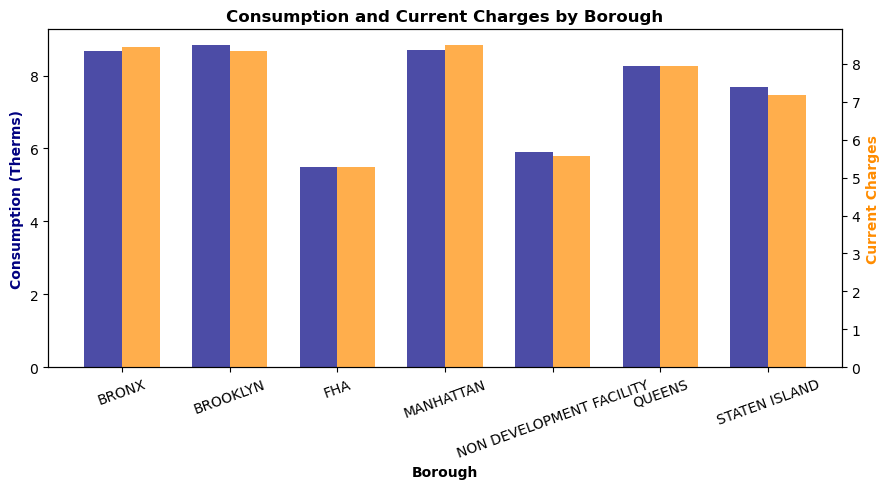

In [5]:
bar_width = 0.35
index = np.arange(len(bor_df['Borough']))

# Tạo figure và hai trục tung
fig, ax1 = plt.subplots(figsize=(9, 5))
# Gán nhãn trục x
plt.xticks(index, bor_df['Borough'], rotation=20)
# Vẽ cột đôi cho Consumption (Therms) trên trục tung thứ nhất
ax1.bar(index - bar_width/2, bor_df['Consumption (Therms)'], alpha=0.7, color='navy', width=bar_width, label='Consumption (Therms)')
ax1.set_xlabel('Borough', fontweight='bold')
ax1.set_ylabel('Consumption (Therms)', color='navy', fontweight='bold')
ax1.tick_params(axis='y')

# Tạo trục tung thứ hai
ax2 = ax1.twinx()

# Vẽ cột đôi cho Current Charges trên trục tung thứ hai
ax2.bar(index + bar_width/2, bor_df['Current Charges'], alpha=0.7, color='darkorange', width=bar_width, label='Current Charges')
ax2.set_ylabel('Current Charges', color='darkorange', fontweight='bold')
ax2.tick_params(axis='y')

plt.title('Consumption and Current Charges by Borough', fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Thông qua biểu đồ trên ta có thể kiểm tra lại kết quả phía trên và rút ra vài nhận xét sau:**

- Nhóm các quận có nhu cầu tiêu thụ khí đốt nóng cao là: `BROOKLYN`, `MANHATTAN `, `BRONX`, `QUEENS` và `STATEN ISLAND`.
- Nhóm các quận có nhu cầu tiêu thị khí đốt nóng thấp là: `FHA` và `NON DEVELOPMENT FACILITY`.

=> Căn cứ vào các nhóm trên, chính quyền thành phố sẽ điều chỉnh chi phí, nguồn hỗ trợ phù hợp với từng quận một cách hợp lí.

## 2. Năm nào thành phố dành nhiều chi phí và có nhu cầu tiêu thụ khí đốt nóng nhiều nhất?
**- Mục đích:** 

   + Nhằm đánh giá, tổng kết về sự tiêu thụ và chi phí cho khí đốt nóng của toàn thành phố New York trong các năm vừa qua.
   + Hỗ trợ cho công tác dự đoán về nhu cầu tiêu thụ khí đốt nóng trong tương lai, giúp cho cơ quan có thể quyền điều chỉnh các chính sách hỗ trợ kịp thời.
    
**- Cách thực hiện:** 

   + Group by gas_df theo `Year` để tính tổng `Consumption (Therms)` và `Current Charges` cho mỗi năm. Sau đó, lưu kết quả và dataframe `year_df`.
   + Trực quan hóa `year_df` bằng biểu đồ cột. Dựa vào biểu đồ ta đưa ra câu trả lời và có một số nhận xét.

In [6]:
# Nhóm dữ liệu theo 'Year' và tính tổng 'Consumption (Therms)' và 'Current Charges' cho mỗi năm
year_df = gas_df.groupby('Year').agg({
    'Consumption (Therms)': 'sum',
    'Current Charges': 'sum'
}).reset_index()
print('** LƯỢNG TIÊU THỤ VÀ CHI PHÍ CHO KHÍ ĐỐT NÓNG CỦA THÀNH PHỐ NEW YORK**')
year_df

** LƯỢNG TIÊU THỤ VÀ CHI PHÍ CHO KHÍ ĐỐT NÓNG CỦA THÀNH PHỐ NEW YORK**


,Year,Consumption (Therms),Current Charges
0,2010,1.550027e+08,7.349879e+07
1,2011,1.583319e+08,7.415169e+07
2,2012,1.482613e+08,7.294725e+07
3,2014,1.689096e+08,7.168630e+07
4,2015,1.677452e+08,7.249321e+07
5,2016,1.652678e+08,6.844660e+07
6,2017,1.751586e+08,7.645741e+07
7,2018,1.914626e+08,8.398120e+07
8,2019,1.772780e+08,8.008865e+07
9,2020,2.002943e+08,1.118019e+08


In [7]:
consumption_max = year_df.loc[year_df['Consumption (Therms)'].idxmax()]['Year'].astype(int)
charges_max = year_df.loc[year_df['Current Charges'].idxmax()]['Year'].astype(int)
print("** TRẢ LỜI CÂU HỎI **")
print(f"- Năm có lượng tiêu thụ cao nhất: ", consumption_max)
print(f"- Năm có chi phí cao nhất: ", charges_max)

** TRẢ LỜI CÂU HỎI **
- Năm có lượng tiêu thụ cao nhất:  2020
- Năm có chi phí cao nhất:  2021


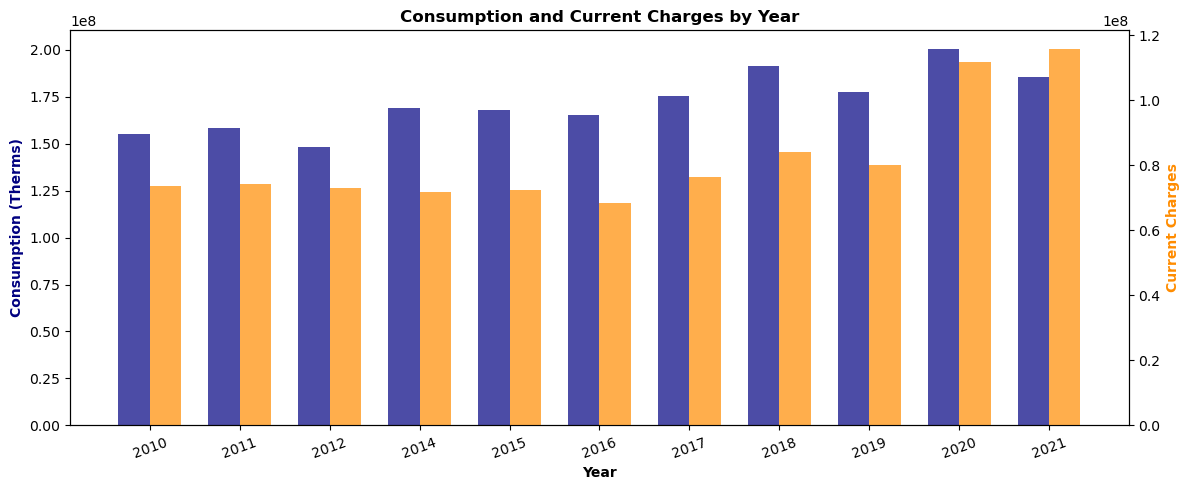

In [8]:
bar_width = 0.35
index = np.arange(len(year_df['Year']))

# Tạo figure và hai trục tung
fig, ax1 = plt.subplots(figsize=(12, 5))
# Gán nhãn trục x
plt.xticks(index, year_df['Year'], rotation=20)
# Vẽ cột đôi cho Consumption (Therms) trên trục tung thứ nhất
ax1.bar(index - bar_width/2, year_df['Consumption (Therms)'], alpha=0.7, color='navy', width=bar_width, label='Consumption (Therms)')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Consumption (Therms)', color='navy', fontweight='bold')
ax1.tick_params(axis='y')

# Tạo trục tung thứ hai
ax2 = ax1.twinx()

# Vẽ cột đôi cho Current Charges trên trục tung thứ hai
ax2.bar(index + bar_width/2, year_df['Current Charges'], alpha=0.7, color='darkorange', width=bar_width, label='Current Charges')
ax2.set_ylabel('Current Charges', color='darkorange', fontweight='bold')
ax2.tick_params(axis='y')

plt.title('Consumption and Current Charges by Year', fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét:**
- Từ năm 2010 đến 2015 nhu cầu tiêu thụ khí đốt nóng của thành phố New York vẫn giữ ổn định và không có nhiều biến động.
- Từ năm 2017 nhu cầu tiêu thụ cũng như mức chi phí dành cho khí đốt nóng có xu hướng tăng cao.
- 2021 là năm không phải có lượng tiêu thụ nhiều nhất nhưng lại là năm có mức chi phí cao nhất, cho thấy có sự biến động về giá cả của khí đốt nóng.  

## 3.Thị phần của các nhà cung cấp qua từng năm?
**- Mục đích:** 

   + Giúp ta có cái nhìn toàn cảnh về thị trường về các nhà cung cấp khí đốt nóng. Đánh giá sự cạnh tranh, mức độ tăng, hay giảm thị phần qua , do sự gia tăng của các đối thủ hay sự biến động của thị trường.
   + Cung cấp các ý kiến quan trọng về sự phát triển của thị trường, độc lập hoặc liên kết giữa các nhà cung cấp và xu hướng tiêu dùng khí đốt nóng.
    
**- Cách thực hiện:** 
   + Tính tổng `Consumption (Therms)` cho mỗi nhà cung cấp và theo từng năm và lưu vào dataframe `vendor_consumption_by_year`. Sau đó, ta sẽ tính tỉ lệ phần trăm mỗi nhà cung cấp theo từng năm và lưu vào dataframe `vendor_consumption_percent`.
   + Trực quan hóa `vendor_consumption_percent` bằng biểu đồ đường.

In [9]:
# Tính tổng 'Consumption (Therms)' cho mỗi nhà cung cấp và theo từng năm
vendor_consumption_by_year = gas_df.groupby(['Year', 'Vendor Name'])['Consumption (Therms)'].sum().unstack()
# Tính tổng tiêu thụ trong mỗi năm để tính phần trăm
total_consumption_by_year = vendor_consumption_by_year.sum(axis=1)
vendor_consumption_percent = vendor_consumption_by_year.divide(total_consumption_by_year, axis=0) * 100
# Chuyển giá trị NaN thành 0
vendor_consumption_percent = vendor_consumption_percent.fillna(0)
vendor_consumption_percent

Vendor Name,CONSOLIDATED EDISON COMPANY OF NY,DIRECT ENERGY BUSINESS (32179),NATIONAL GRID LI,NATIONAL GRID NYC
Year,,,,
2010,58.380944,0.00000,2.436999,39.182056
2011,57.639046,0.00000,3.057534,39.303419
2012,58.148961,0.00000,2.551295,39.299744
2014,58.380189,0.00000,1.789355,39.830456
2015,57.252094,0.00000,2.825130,39.922776
2016,57.078189,0.00000,2.443537,40.478274
2017,57.610205,0.00000,3.120499,39.269296
2018,57.374515,0.00000,2.478485,40.147000
2019,58.284061,0.00026,2.175332,39.540347


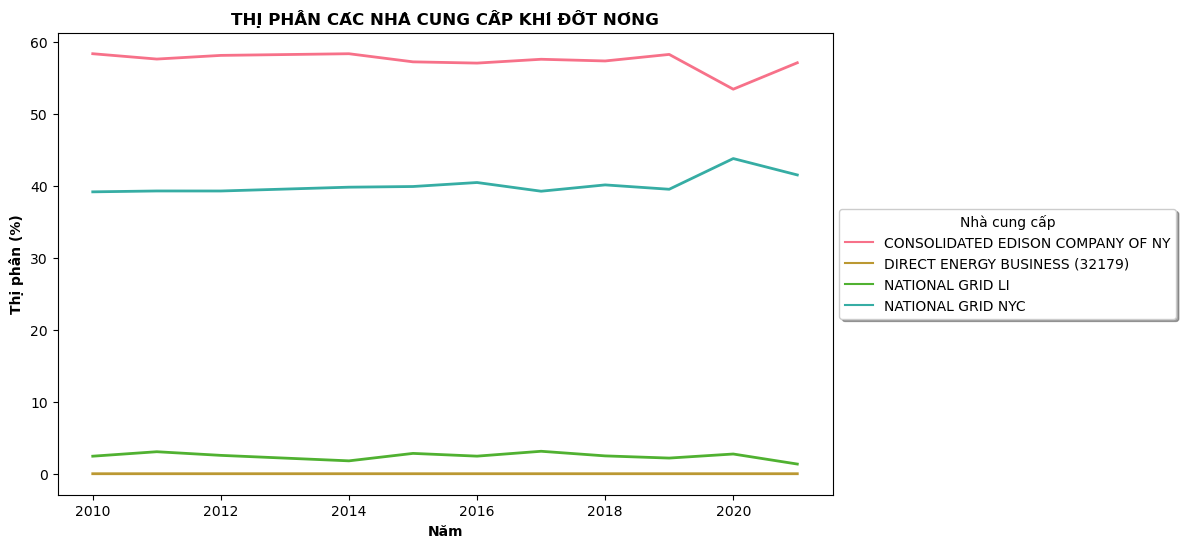

In [10]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
sns.set_palette("husl")  # Chọn bảng màu
sns.lineplot(data=vendor_consumption_percent, dashes=False, lw=2)
plt.title('THỊ PHẦN CÁC NHÀ CUNG CẤP KHÍ ĐỐT NÓNG',fontweight='bold')
plt.xlabel('Năm',fontweight='bold')
plt.ylabel('Thị phần (%)',fontweight='bold')
plt.legend(title='Nhà cung cấp', loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)
plt.show()

**TRẢ LỜI CÂU HỎI VÀ ĐƯA RA NHẬN XÉT**

- Dựa vào biểu đồ trên đã cung cấp bức tranh toàn cảnh về thị phần các nhà cung cấp qua từng năm:
    + Nhìn chung thị phần các nhà cung cấp biến đổi không đáng kể trong các năm từ 2010-2021
    + `CONSOLIDATED EDISON COMPANY OF NY` là nhà cung cấp với thị phần cao nhất gần 60% của mỗi năm, xếp sau đó là `NATIONAL GRID NYC` với gần 40% mỗi năm.
    + `1DIRECT ENERGY BUSINESS (32179)` và	`NATIONAL GRID` là 2 nhà cung cấp có thị phần khá thấp, dưới 5% mỗi năm.
    + Năm 2020, ta nhận thấy có sẽ biến động của `CONSOLIDATED EDISON COMPANY OF NY` xuống 53% và `NATIONAL GRID NYC` tăng lên 44%.
    
=> Các nhà cung cấp nên tập trung vào việc đầu tư mới và phát triển để gia tăng thị phần. Đồng thời, duy trì và phát triển vào việc gia tăng lợi nhuận từ khách hàng hiện có.

## 4. Nguồn tài trợ của toàn thành phố và các quận chủ yếu đến từ đâu?
**- Mục đích:** 

   + Giúp đánh giá các nguồn tài trợ hiện tại và có cái nhìn về khả năng đáp ứng nhu cầu của thành phố hoặc các quận cụ thể.
   + Hiểu rõ về các nguồn tài trợ có thể giúp các cơ quan quản lý đảm bảo việc sử dụng nguồn lực một cách có hiệu quả và minh bạch. Từ đó đưa ra các chính sách phân bổ nguồn tài trợ một cách hợp lí, các chính sách dựa trên nguồn tài trợ.
   + Thông tin này cũng có thể hỗ trợ người dân hiểu rõ hơn về cách thành phố được quản lý và chi phí hoạt động cơ bản hàng ngày.
    
**- Cách thực hiện:** 

   + Group by các cột `Funding Source` và `Borough`, tính tổng `Current Charges` và lưu vào dataframe `charges_by_source`. Và để 
thuận tiện cho quá trình so sánh ta sẽ tiến hành `log10` giá trị của `charges_by_source`.
   + Ta sẽ trực quan hóa `charges_by_source` thông qua biểu đồ cột chồng.

<Figure size 1200x1000 with 0 Axes>

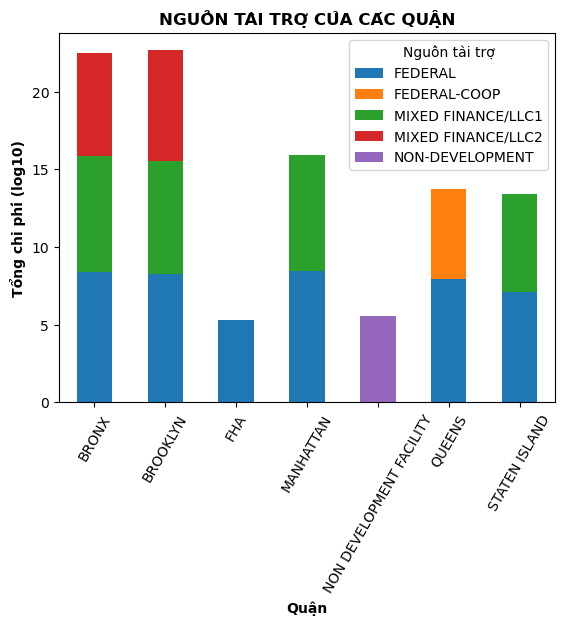

In [11]:
# Thống kê tổng 'Current Charges' theo 'Funding Source' và 'Borough'
charges_by_source = gas_df.groupby(['Borough', 'Funding Source'])['Current Charges'].sum().unstack()
charges_by_source = np.log10(charges_by_source).fillna(0)
# Bảng màu tab10
colors = plt.cm.tab10(np.arange(len(charges_by_source.columns)))
# Vẽ biểu đồ cột chồng
plt.figure(figsize=(12, 10))
charges_by_source.plot(kind='bar', stacked=True, color=colors)

plt.title('NGUỒN TÀI TRỢ CỦA CÁC QUẬN', fontweight='bold')
plt.xlabel('Quận', fontweight='bold')
plt.ylabel('Tổng chi phí (log10)', fontweight='bold')
plt.legend(title='Nguồn tài trợ', loc='upper right')
plt.xticks(rotation= 60)
plt.show()

**Thông qua biểu đồ cột chồng bên trên đã cho ta thông tin chi tiết các nguồn tài trợ của các quận, đồng thời ta có thể đưa ra một số nhận xét sau:**

- `FEDERAL` là nguồn tài trợ nhiều nhất ở các quận, đứng thứ hai là `MIXED FINANCE/LLC1`.
- `FHA` và `NON DEVELOPMENT FACILITY` là 2 đơn vị có nguồn tài trợ ít nhất.

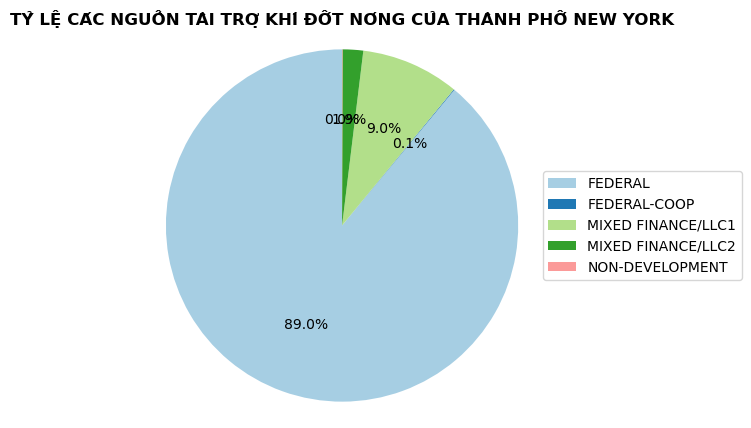

In [12]:
city_by_source = gas_df.groupby('Funding Source')['Current Charges'].sum()
# Vẽ biểu đồ tròn từ dữ liệu đã nhóm và tính tổng
plt.figure(figsize=(5, 5))  # Kích thước của biểu đồ tròn
colors = plt.cm.Paired(range(len(city_by_source)))  # Sử dụng màu từ bảng màu Paired

# Vẽ biểu đồ tròn
plt.pie(city_by_source, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(city_by_source.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('TỶ LỆ CÁC NGUỒN TÀI TRỢ KHÍ ĐỐT NÓNG CỦA THÀNH PHỐ NEW YORK',fontweight='bold')
plt.axis('equal')  # Đảm bảo biểu đồ tròn được vẽ hợp lý
plt.show()


**Theo biểu đồ trên, cũng có thể dự đoán ngay từ biểu đồ về `Nguồn tài trợ của các quận`ở phía trên thì `FEDERAL`chính là nguồn tài trợ chủ yếu của thành phố New York với 89%.**